In [ ]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('segmentation data.csv', index_col = 0)

## ${\textbf{Exploratory Data Analysis}}$

In [ ]:
df.head()

In [ ]:
df.describe()

## ${\textbf{Correlation Estimate}}$

Sex                0.172769
Marital status     0.014011
Age                1.009940
Education          0.487172
Income             1.196085
Occupation         0.188522
Settlement size    0.510541
dtype: float64

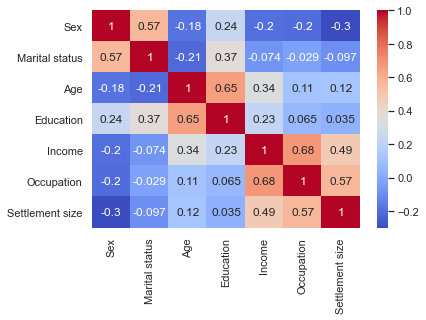

In [43]:
sns.heatmap(df.corr(), annot= True, cmap = 'coolwarm')
df.skew()

## ${\textbf{Transforming}}$

In [44]:
df['Log_Income'] = np.log(df['Income'])
df = df.drop(['Income'], axis = 1)

## ${\textbf{Standardization}}$

In [45]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

## ${\textbf{K-means Clustering}}$

In [46]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

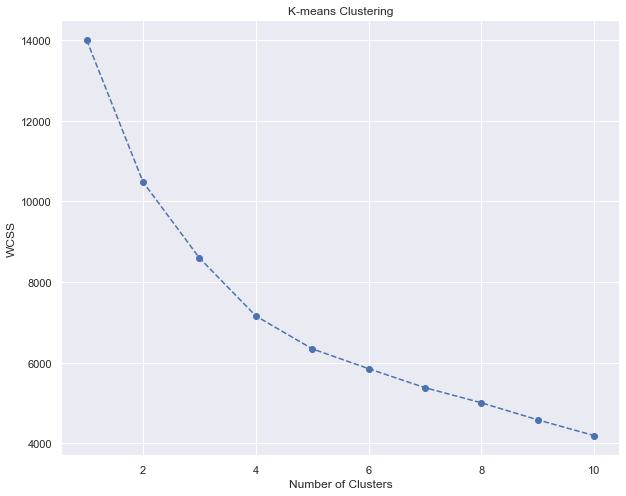

In [47]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [49]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{Results}}$

In [50]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [51]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Occupation,Settlement size,Log_Income
Segment K-means,,,,,,,
0,0.521127,0.693662,55.457746,2.126761,1.035211,1.017606,11.902617
1,0.725599,0.985267,28.055249,1.001842,1.075506,0.837937,11.689059
2,0.008547,0.006838,36.776068,0.675214,1.186325,1.246154,11.809434
3,0.624150,0.437075,32.857143,0.906463,0.083333,0.008503,11.355380


In [52]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [53]:
df_segm_analysis

,Sex,Marital status,Age,Education,Occupation,Settlement size,Log_Income,N Obs
Segment K-means,,,,,,,,
0,0.521127,0.693662,55.457746,2.126761,1.035211,1.017606,11.902617,284
1,0.725599,0.985267,28.055249,1.001842,1.075506,0.837937,11.689059,543
2,0.008547,0.006838,36.776068,0.675214,1.186325,1.246154,11.809434,585
3,0.624150,0.437075,32.857143,0.906463,0.083333,0.008503,11.355380,588


In [54]:
df_segm_analysis.rename({0:'cluster 1',
                         1:'cluster 2',
                         2:'cluster 3',
                         3:'cluster 4'})

,Sex,Marital status,Age,Education,Occupation,Settlement size,Log_Income,N Obs
Segment K-means,,,,,,,,
cluster 1,0.521127,0.693662,55.457746,2.126761,1.035211,1.017606,11.902617,284
cluster 2,0.725599,0.985267,28.055249,1.001842,1.075506,0.837937,11.689059,543
cluster 3,0.008547,0.006838,36.776068,0.675214,1.186325,1.246154,11.809434,585
cluster 4,0.624150,0.437075,32.857143,0.906463,0.083333,0.008503,11.355380,588


In [55]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'cluster 1', 
                                                                  1:'cluster 2',
                                                                  2:'cluster 3', 
                                                                  3:'cluster 4'})

C:\Users\Khoo Chee Kuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


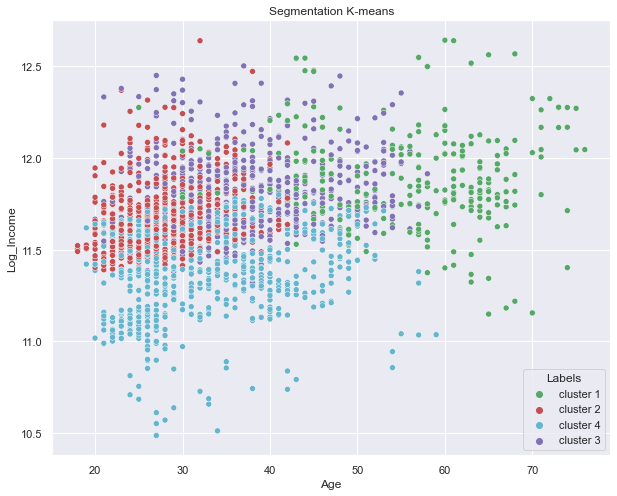

In [60]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Log_Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [61]:
pca = PCA()

In [62]:
pca.fit(segmentation_std)

PCA()

In [63]:
pca.explained_variance_ratio_ # summing all everything will get one
#first component explained around 35 % of the data.


array([0.35920079, 0.26228764, 0.18913989, 0.07457506, 0.05712724,
       0.03761493, 0.02005444])

Text(0, 0.5, 'Cumulative Explained Variance')

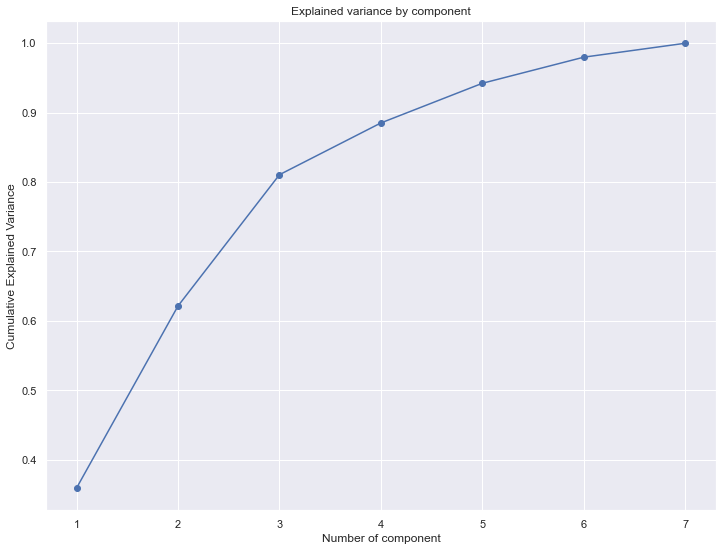

In [64]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o')
plt.title('Explained variance by component')
plt.xlabel('Number of component')
plt.ylabel('Cumulative Explained Variance')

In [65]:
pca = PCA(n_components = 3) # extract the 3 most important component

In [66]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [67]:
scores_pca = pca.transform(segmentation_std)
scores_pca

array([[ 2.56761265,  0.85836566,  2.195235  ],
       [ 0.4151538 ,  0.6151964 , -2.2227067 ],
       [-0.67865732, -0.68836781,  2.27365886],
       ...,
       [-1.47701772, -2.24785645,  0.87736559],
       [-2.20007079,  0.62976746, -0.57088747],
       [-2.04262065, -2.50088739,  0.69295806]])

In [68]:
pca.components_

array([[-0.31228368, -0.18854864,  0.31821246,  0.15246956,  0.49514907,
         0.4671469 ,  0.5282266 ],
       [ 0.45765574,  0.51356653,  0.31175595,  0.64024421,  0.01826903,
        -0.06599219,  0.12250511],
       [-0.29679419, -0.44134884,  0.61559744,  0.28092354, -0.38564633,
        -0.28471119, -0.17164678]])

In [69]:
df_pca = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca

,Sex,Marital status,Age,Education,Occupation,Settlement size,Log_Income
Component 1,-0.312284,-0.188549,0.318212,0.152470,0.495149,0.467147,0.528227
Component 2,0.457656,0.513567,0.311756,0.640244,0.018269,-0.065992,0.122505
Component 3,-0.296794,-0.441349,0.615597,0.280924,-0.385646,-0.284711,-0.171647


([<matplotlib.axis.YTick at 0x1678aaaa700>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

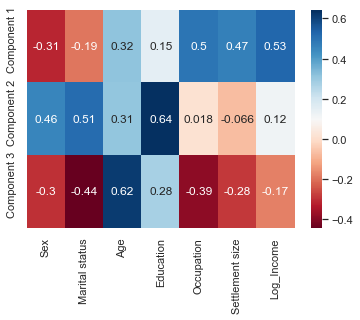

In [70]:
sns.heatmap(df_pca,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'])

In [71]:
scores_pca = pca.transform(segmentation_std)

In [72]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

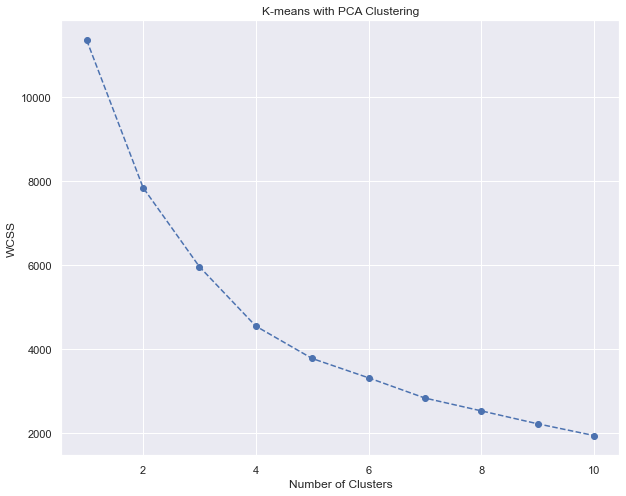

In [73]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [74]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [75]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [76]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [77]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Occupation,Settlement size,Log_Income,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,1,2,11.733426,2.567613,0.858366,2.195235,2
1,1,1,22,1,1,2,11.923531,0.415154,0.615196,-2.222707,3
2,0,0,49,1,0,0,11.398748,-0.678657,-0.688368,2.273659,1
3,0,0,45,1,1,1,12.052717,1.691629,-0.585756,0.742318,0
4,0,0,53,1,1,1,11.911910,1.665972,-0.429230,1.241588,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,0,0,11.724199,-0.798374,0.307351,1.390325,1
1996,1,1,27,1,1,0,11.676268,-1.025787,0.811779,-1.120404,3
1997,0,0,31,0,0,0,11.366743,-1.477018,-2.247856,0.877366,1
1998,1,1,24,1,0,0,11.492396,-2.200071,0.629767,-0.570887,1


In [78]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Occupation,Settlement size,Log_Income,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.000000,0.031826,36.763819,0.681742,1.190955,1.251256,11.812460,1.253093,-1.223111,0.063668
1,0.616462,0.444834,32.716287,0.893170,0.070053,0.007005,11.345370,-1.736014,-0.232371,0.593249
2,0.531034,0.689655,55.279310,2.124138,1.013793,0.996552,11.897206,1.404087,2.022743,0.963958
3,0.752768,0.959410,27.966790,1.001845,1.062731,0.808118,11.683672,-0.302615,0.509752,-1.210892


In [79]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'cluster 1', 
                                                          1:'cluster 2',
                                                          2:'cluster 3', 
                                                          3:'cluster 4'})

df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Occupation,Settlement size,Log_Income,Component 1,Component 2,Component 3,N Obs
Segment K-means PCA,,,,,,,,,,,
standard,0.000000,0.031826,36.763819,0.681742,1.190955,1.251256,11.812460,1.253093,-1.223111,0.063668,597
career focused,0.616462,0.444834,32.716287,0.893170,0.070053,0.007005,11.345370,-1.736014,-0.232371,0.593249,571
fewer opportunities,0.531034,0.689655,55.279310,2.124138,1.013793,0.996552,11.897206,1.404087,2.022743,0.963958,290
well-off,0.752768,0.959410,27.966790,1.001845,1.062731,0.808118,11.683672,-0.302615,0.509752,-1.210892,542


In [80]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Cluster 1', 
                                                          1:'Cluster 2',
                                                          2:'Cluster 3', 
                                                          3:'Cluster 4'})

C:\Users\Khoo Chee Kuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


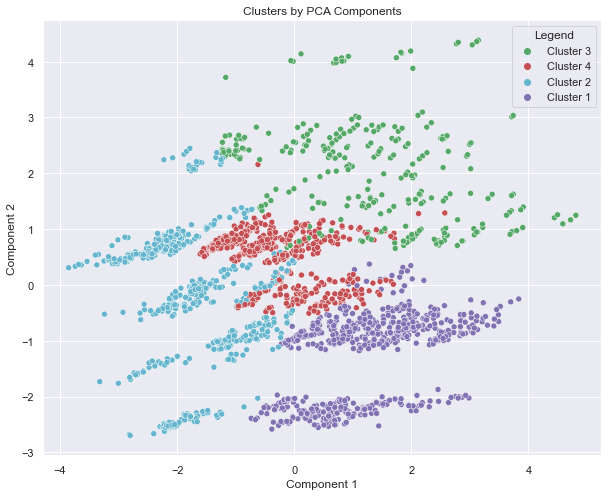

In [81]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\Khoo Chee Kuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


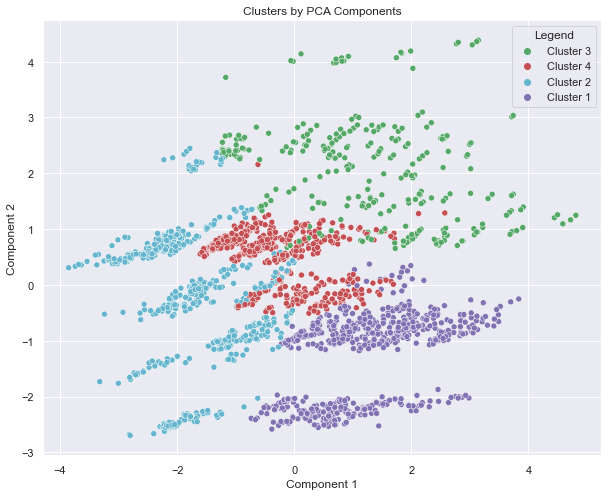

In [82]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\Khoo Chee Kuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


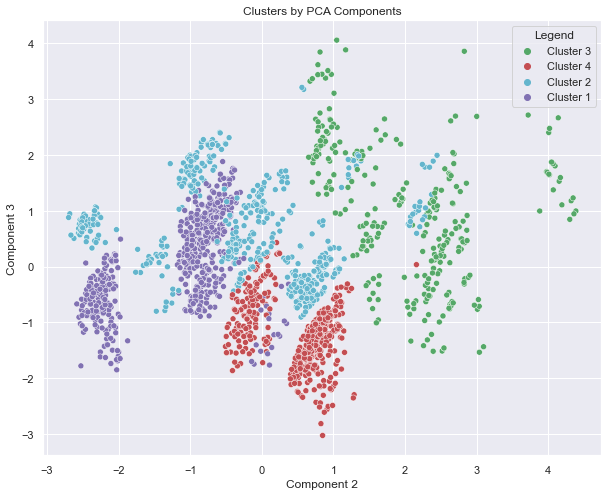

In [83]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()